# Setiment Analysis using Reddit API 

## Setting Up Reddit API Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/NegotiationPast5409"
reddit = praw.Reddit(
    client_id="IQleoMr_1Bq2UJbhG1ks-g",
    client_secret="gLrM8yfvJcq2L-wqXo3KROOICNEWyg",
    user_agent=user_agent
)

# Import Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\saimi\AppData\Local\Temp\ipykernel_9400\3422756113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Trending Topics on Selected Word

In [32]:
# Picking out a trending topic 
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
233
0.96
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


# Selecting headlines of subreddits on selected topic

In [33]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

741


# Creating a Data frame on the Reddit Data

In [35]:
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Why don’t more companies hold Bitcoin on their...
1,"It’s been an odd 2 years, bankruptcy, buying a..."
2,Bitcoin Testnet
3,How to hold btc without 3rd party wallet?
4,How do you report to IRS gambling winnings tha...


In [36]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

# Renamining Columns to Titles

In [37]:

bitcoin_df.columns = ['Titles']
bitcoin_df.head()

,Titles
0,Why don’t more companies hold Bitcoin on their...
1,"It’s been an odd 2 years, bankruptcy, buying a..."
2,Bitcoin Testnet
3,How to hold btc without 3rd party wallet?
4,How do you report to IRS gambling winnings tha...


# Cleaning the retrieved content based on the regex Functions

In [38]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Why don’t more companies hold Bitcoin on their...
1,"It’s been an odd 2 years, bankruptcy, buying a..."
2,Bitcoin Testnet
3,How to hold btc without 3rd party wallet?
4,How do you report to IRS gambling winnings tha...


In [39]:
# Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Why don’t more companies hold Bitcoin on their...
1,"It’s been an odd 2 years, bankruptcy, buying a..."
2,Bitcoin Testnet
3,How to hold btc without 3rd party wallet?
4,How do you report to IRS gambling winnings tha...


In [40]:
bitcoin_df.describe()

,Titles
count,741
unique,741
top,Why don’t more companies hold Bitcoin on their...
freq,1


In [41]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Creating subjectivity and polarity 

In [42]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Why don’t more companies hold Bitcoin on their...,0.50,0.500000
1,"It’s been an odd 2 years, bankruptcy, buying a...",0.25,-0.166667
2,Bitcoin Testnet,0.00,0.000000
3,How to hold btc without 3rd party wallet?,0.00,0.000000
4,How do you report to IRS gambling winnings tha...,0.00,0.000000


In [43]:
# Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Why don’t more companies hold Bitcoin on their...,0.500000,0.500000,Positive
1,"It’s been an odd 2 years, bankruptcy, buying a...",0.250000,-0.166667,Negative
2,Bitcoin Testnet,0.000000,0.000000,Neutral
3,How to hold btc without 3rd party wallet?,0.000000,0.000000,Neutral
4,How do you report to IRS gambling winnings tha...,0.000000,0.000000,Neutral
5,Took a loan to buy BTC today...,0.000000,0.000000,Neutral
6,God Help Us When The God Candle Come For Us,0.000000,0.000000,Neutral
7,10 Lessons for Financial Institutions from Cry...,0.000000,0.000000,Neutral
8,Ex-PayPal CEO Peter Thiel’s VC Firm Bought $10...,0.400000,-0.200000,Negative
9,Check how long your stack can go with Power law,0.400000,-0.050000,Negative


In [44]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Sentiment Analysis

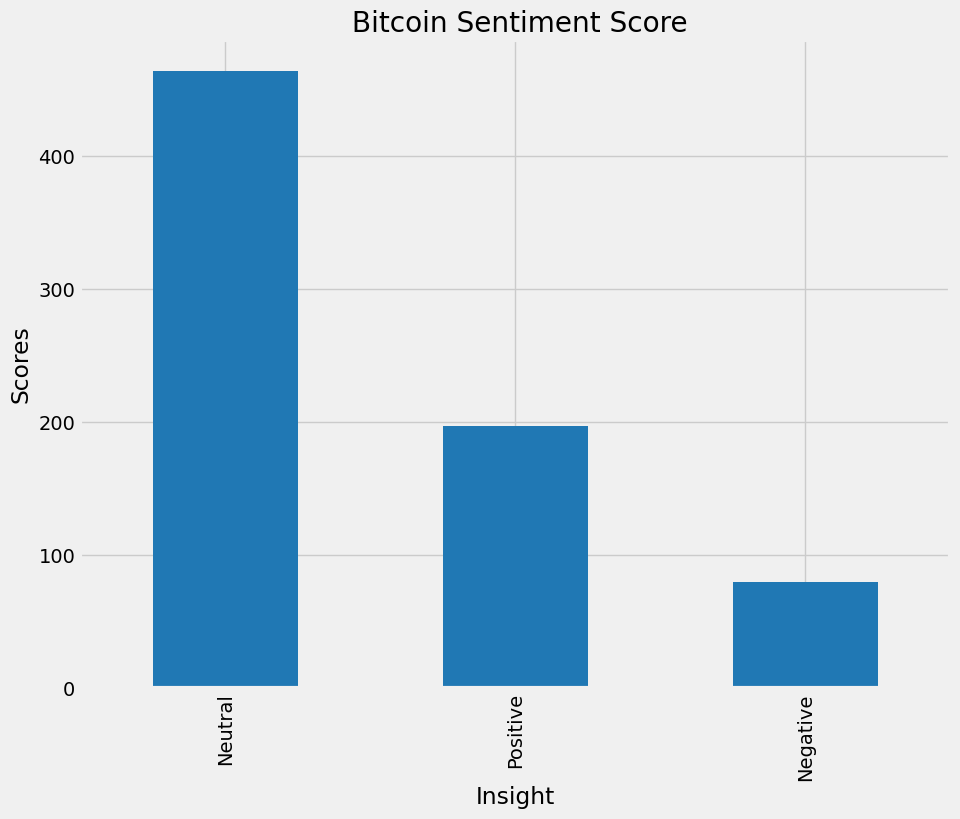

In [45]:
#  Plot the values count of sentiment
plt.title(" Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Worldcloud

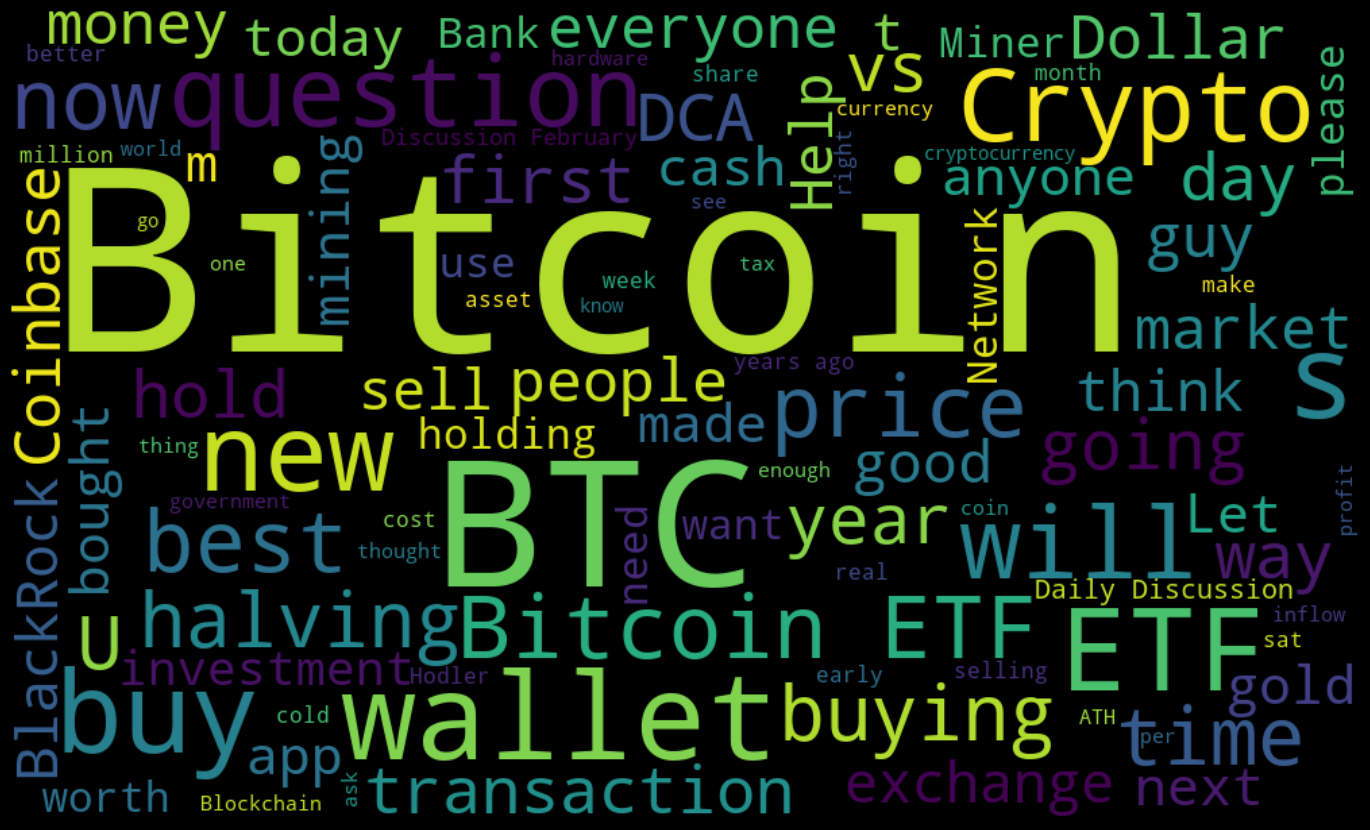

In [46]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");